## comentarios

### Regresión Polinomial y Validación Cruzada (10pts)

no usa validación cruzada en  todo el conjunto de datos
es decir, el entrenamiento siempre es con los mismos datos

### ***puntos 4/10***

### **Regularización**

no usa validación cruzada en  todo el conjunto de datos y de hecho solo la hace con polinomio de grado 5 y en el conjunto de entrenamiento


### ***puntos 4/10***


### **bootstrap**

OK
### ***puntos 10/10***



# Parte 2: Random muestras
Mariana Ramirez, Santiago Hoyos y Camila Nahuel

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

## Cargar datos

In [ ]:
XTrain = pd. DataFrame(np.load('part2xTrain.npy'), columns=['X'])
XVal = pd. DataFrame(np.load('part2xVal.npy'), columns=['X'])
yTrain = pd. DataFrame(np.load('part2yTrain.npy'), columns=['y'])
yVal = pd. DataFrame(np.load('part24yVal.npy'), columns=['y'])

print('Train size: ',XTrain.size,'Validation size: ',yVal.size)

Train size:  12 Validation size:  10


Para el cross validation vamos a combinar los datos de xTrain, xVal, yTrain y yVal en únicos datos X,y

In [ ]:
X_combined = pd.concat([XTrain, XVal], ignore_index=True)
y_combined = pd.concat([yTrain, yVal], ignore_index=True)

## a) Regresión Polynomial y Validación cruzada

### Regresión polinomial de grado 3

In [ ]:
degree = 3
poly3 = PolynomialFeatures(degree)
X_poly_train3 = poly3.fit_transform(XTrain)
X_poly_val3 = poly3.transform(XVal)

poly_regr3 = LinearRegression()
poly_regr3.fit(X_poly_train3, yTrain)
pred = poly_regr3.predict(X_poly_val3)

In [ ]:
print("RMSE: ", np.sqrt(mean_squared_error(yVal, pred)))
print("MAE: ", mean_absolute_error(yVal, pred))
print('\n')
print(poly_regr3.coef_)
print('Intercept: ',poly_regr3.intercept_)

RMSE:  11.033181525023409
MAE:  10.239273706669419


[[ 0.         -2.64198852 10.10281188  0.33544213]]
Intercept:  [-16.68746077]


Cross Validation

In [ ]:
X_poly_combined3 = poly3.fit_transform(X_combined)
cv = cross_validate(poly_regr3,X_poly_combined3, y_combined,
                    scoring=('neg_mean_absolute_error','neg_root_mean_squared_error'),
                    return_train_score=True, error_score='raise')

print("RMSE Train: ", -cv['train_neg_root_mean_squared_error'])
print("MAE Train: ", -cv['train_neg_mean_absolute_error'])

print("RMSE Val: ", -cv['test_neg_root_mean_squared_error'])
print("MAE Val: ", -cv['test_neg_mean_absolute_error'])

RMSE Train:  [ 9.51343165 12.40595081 12.38919812 12.62417376 12.3332617 ]
MAE Train:  [ 8.47731867 11.59302726 11.37482794 11.51926895 11.31582561]
RMSE Val:  [20.57169644 11.27065897 11.46812142  9.60547952 11.48307666]
MAE Val:  [18.18304738  9.77855856 10.77672032  9.10432823 10.65508657]


Vamos a explicar bien estos errores pero la misma explicación se puede aplicar al resto de los modelos de manera similar.

Cuando utilizamos la función cross_validate le estamos pidiendo que utiliza el modelo que le pasamos y divida nuestro datos en subconjuntos. La función entrera os modelos con algunos de estos datos y despues la valida con los restantes. En este caso se dividieron los datos en 5 'folds' que nos arrojaron los errores de RMSE y MAE con los conjuntos de training y los de validation.

### Regresión polinomias de grado 4

In [ ]:
degree = 4
poly4 = PolynomialFeatures(degree)
X_poly_train4 = poly4.fit_transform(XTrain)
X_poly_val4 = poly4.transform(XVal)

poly_regr4 = LinearRegression()
poly_regr4.fit(X_poly_train4, yTrain)
pred4 = poly_regr4.predict(X_poly_val4)

In [ ]:
print("RMSE: ", np.sqrt(mean_squared_error(yVal, pred4)))
print("MAE: ", mean_absolute_error(yVal, pred4))
print('\n')
print(poly_regr4.coef_)
print('Intercept: ',poly_regr4.intercept_)

RMSE:  1.9550898511662238
MAE:  1.6225600872046324


[[  0.           0.03133066 -14.81585256   0.06033144   3.91219511]]
Intercept:  [6.73226767]


Cross Validation

In [ ]:
X_poly_combined4 = poly4.fit_transform(X_combined)
cv = cross_validate(poly_regr4,X_poly_combined4, y_combined,
                    scoring=('neg_mean_absolute_error','neg_root_mean_squared_error'),
                    return_train_score=True, error_score='raise')

print("RMSE Train: ", -cv['train_neg_root_mean_squared_error'])
print("MAE Train: ", -cv['train_neg_mean_absolute_error'])

print("RMSE Val: ", -cv['test_neg_root_mean_squared_error'])
print("MAE Val: ", -cv['test_neg_mean_absolute_error'])


RMSE Train:  [1.49426396 1.18487055 1.63095855 1.51420928 1.61380902]
MAE Train:  [1.22384322 1.03961015 1.33789714 1.23747489 1.33358824]
RMSE Val:  [2.55075631 2.80193388 1.55872279 2.25323038 1.52310058]
MAE Val:  [2.28466877 2.33283972 1.41667551 1.89622721 1.25540316]


### Regresión polinomias de grado 5

In [ ]:
degree = 5
poly5 = PolynomialFeatures(degree)
X_poly_train5 = poly5.fit_transform(XTrain)
X_poly_val5 = poly5.transform(XVal)

poly_regr5 = LinearRegression()
poly_regr5.fit(X_poly_train5, yTrain)
pred5 = poly_regr5.predict(X_poly_val5)

In [ ]:
print("RMSE: ", np.sqrt(mean_squared_error(yVal, pred5)))
print("MAE: ", mean_absolute_error(yVal, pred5))
print('\n')
print(poly_regr5.coef_)
print('Intercept: ',poly_regr5.intercept_)

RMSE:  1.956244466845314
MAE:  1.6137201921716993


[[ 0.00000000e+00 -4.19551892e-02 -1.48019992e+01  1.03850082e-01
   3.91025180e+00 -5.44334607e-03]]
Intercept:  [6.71108716]


Cross Validation

In [ ]:
X_poly_combined5 = poly5.fit_transform(X_combined)
cv = cross_validate(poly_regr5,X_poly_combined5, y_combined,
                    scoring=('neg_mean_absolute_error','neg_root_mean_squared_error'),
                    return_train_score=True, error_score='raise')

print("RSME: ", -cv['train_neg_root_mean_squared_error'])
print("MAE: ", -cv['train_neg_mean_absolute_error'])

print("RSME: ", -cv['test_neg_root_mean_squared_error'])
print("MAE: ", -cv['test_neg_mean_absolute_error'])


RSME:  [1.49367336 1.18052268 1.62925326 1.51130973 1.59552403]
MAE:  [1.21897241 1.02820894 1.34306851 1.24474171 1.30980254]
RSME:  [2.52324772 2.79777828 1.54121185 2.32230274 1.60306131]
MAE:  [2.25377156 2.33555763 1.37985941 1.92636216 1.41570202]


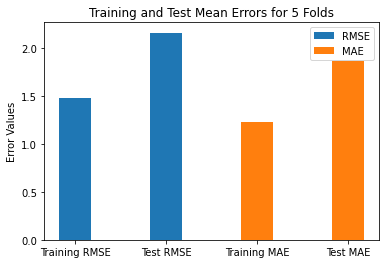

In [ ]:
train_rmse = -cv['train_neg_root_mean_squared_error']
train_mae = -cv['train_neg_mean_absolute_error']
test_rmse = -cv['test_neg_root_mean_squared_error']
test_mae = -cv['test_neg_mean_absolute_error']

labels = ['Training RMSE', 'Test RMSE', 'Training MAE', 'Test MAE']
x = np.arange(len(labels))

fig, ax = plt.subplots()

ax.bar(x[:2], [train_rmse.mean(), test_rmse.mean()], 0.35, label='RMSE')
ax.bar(x[2:], [train_mae.mean(), test_mae.mean()], 0.35, label='MAE', align='center')

ax.set_ylabel('Error Values')
ax.set_title('Training and Test Mean Errors for 5 Folds')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Como se puede ver en este histográma los errores cuando aplicamos los mismos datos en el modelo que utilizamos en el training son menores que cuando le pasamos datos completamente nuevos.

### Regresión polinomias de grado 6

In [ ]:
degree = 6
poly6 = PolynomialFeatures(degree)
X_poly_train6 = poly6.fit_transform(XTrain)
X_poly_val6 = poly6.transform(XVal)

poly_regr6 = LinearRegression()
poly_regr6.fit(X_poly_train6, yTrain)
pred6 = poly_regr6.predict(X_poly_val6)

In [ ]:
print("RSME: ", np.sqrt(mean_squared_error(yVal, pred6)))
print("MAE: ", mean_absolute_error(yVal, pred6))
print('\n')
print(poly_regr6.coef_)
print('Intercept: ',poly_regr6.intercept_)

RSME:  1.9573424733504117
MAE:  1.6124122891364059


[[ 0.00000000e+00 -6.39481137e-02 -1.47348916e+01  1.14984387e-01
   3.88359373e+00 -6.69584552e-03  2.75755479e-03]]
Intercept:  [6.67955543]


Cross Validation

In [ ]:
X_poly_combined6 = poly6.fit_transform(X_combined)
cv = cross_validate(poly_regr6,X_poly_combined6, y_combined,
                    scoring=('neg_mean_absolute_error','neg_root_mean_squared_error'),
                    return_train_score=True, error_score='raise')

print("RMSE Train: ", -cv['train_neg_root_mean_squared_error'])
print("MAE Train: ", -cv['train_neg_mean_absolute_error'])

print("RMSE Val: ", -cv['test_neg_root_mean_squared_error'])
print("MAE Val: ", -cv['test_neg_mean_absolute_error'])

RMSE Train:  [1.32142085 1.17647909 1.62925122 1.51061016 1.59235271]
MAE Train:  [1.06361856 1.01060682 1.34330788 1.24192993 1.29975713]
RMSE Val:  [3.96296011 2.82341594 1.5420035  2.30763591 1.61795651]
MAE Val:  [3.04374879 2.39057848 1.37980708 1.92521399 1.42115792]


Los resultados anteriores nos muestran que la mejor regresión para este dataset es la regresión polinomial de grado 5. Lo anterior se debe a que cuando aplicamos cross validation a cada modelo, la que salío siempre con menor error RMSE y MAE, cuando se evaluó con los datos de training y los de validación, fue la de este grado.

A continuación aplicaremos regularización para mejorar este modelo.

## b) Regularización

#### Ridge

Creamos una array de diferentes valores de lambda

In [ ]:
lambdas = 10**np.linspace(10,-2,100000)
lambdas

array([1.00000000e+10, 9.99723725e+09, 9.99447527e+09, ...,
       1.00055278e-02, 1.00027635e-02, 1.00000000e-02])

Con la función RidgeCV encontramos el mejor valor de lambda para nuestros datos. Esta función hace ridge y cross validation a la vez y el lambda del modelo con mayor precisión es la que retorna.

In [ ]:
lambdas = 10**np.linspace(10,-2,100000)
ridgecv = RidgeCV(alphas = lambdas)
ridgecv.fit(X_poly_train5, yTrain)
ridgecv.alpha_

0.01

In [ ]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_poly_train5, yTrain)
pred = ridge.predict(X_poly_val5)

In [ ]:
print("MSE: ", mean_squared_error(yVal, pred))
print("MAE: ", mean_absolute_error(yVal, pred))
print('\n')
print(ridge.coef_)
print('Intercept: ',ridge.intercept_)

MSE:  3.7713792506257855
MAE:  1.598498683521752


[[ 0.00000000e+00 -7.46047132e-02 -1.47489027e+01  1.20290300e-01
   3.90248822e+00 -7.37648276e-03]]
Intercept:  [6.65117352]


#### Lasso

In [ ]:
lassocv = LassoCV(alphas = lambdas)
lassocv.fit(X_poly_train5, yTrain.values.ravel())
lassocv.alpha_

In [ ]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_poly_train5, yTrain)
pred = lasso.predict(X_poly_val5)

In [ ]:
print("MSE: ", mean_squared_error(yVal, pred))
print("MAE: ", mean_absolute_error(yVal, pred))
print('\n')
print(lasso.coef_)
print('Intercept: ',lasso.intercept_)

El modelo con regularización Lasso tiene los valores más pequeños de RMSE y MAE, aunque es solo una diferencia muy pequeña del 1%.

Ahora visualizemos esta regresión para los datos de training y validación

In [ ]:
plt.scatter(XVal, yVal, label="Datos reales", color="b")
plt.scatter(XTrain, yTrain, label="Datos entrenamiento", color="g")

X_val_sorted = np.sort(XVal, axis=0)
y_pred_sorted = lasso.predict(poly5.transform(X_val_sorted))

plt.plot(X_val_sorted, y_pred_sorted, label="Predicción del modelo", color="r")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Scatter de datos y modelo Lasso")
plt.show()

## c) Evaluación Bootstrap

Para la evalución con bootstrao vamos creear una función que recibe nuestro modelo y lo evalúa en las bootstrap samples con el error MSE

In [ ]:
def bootstrap_mse(model, X, y, num_samples=22, confidence_level=0.95):
    mse_samples = []

    for _ in range(num_samples):
        X_sampled, y_sampled = resample(X, y, replace=True, random_state=None)
        model.fit(X_sampled, y_sampled)
        y_pred = model.predict(X_poly_val5)

        # MSE de bootstrap
        mse = mean_squared_error(yVal, y_pred)
        mse_samples.append(mse)

    # Calculate the confidence interval
    alpha = 1 - confidence_level
    lower_percentile = alpha / 2 * 100
    upper_percentile = (1 - alpha / 2) * 100
    lower_bound = np.percentile(mse_samples, lower_percentile)
    upper_bound = np.percentile(mse_samples, upper_percentile)

    return np.array(mse_samples), lower_bound, upper_bound

In [ ]:
lasso_model = Lasso(alpha=lassocv.alpha_)
mse_samples, lower_bound,upper_bound = bootstrap_mse(lasso_model, X_poly_train5, yTrain, num_samples=10000)

In [ ]:
print('Lower Bound:', lower_bound,"  Upper Bound: ",upper_bound)

In [ ]:
plt.hist(mse_samples, bins=30, edgecolor='k')
plt.title('Distribution MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2, label=f'Lower {int((1 - 0.95) * 100)}%')
plt.axvline(upper_bound, color='g', linestyle='dashed', linewidth=2, label=f'Upper {int(0.95 * 100)}%')

plt.xlim(0,2000)
plt.legend()
plt.show()

Basandonos en esta distribución de uestro eror MSE podemos conlcluir que el modelo que se utilizó es de alta precisión y muy robusto ya uqe la mayoría de los errores están para el mismo valor.

In [ ]:
X_val_sorted = np.sort(XVal, axis=0)
y_pred_sorted = lasso.predict(poly5.transform(X_val_sorted))

mse = mean_squared_error(yVal, y_pred_sorted)

standard_error = np.std(mse_samples)
margin_of_error = (upper_bound - lower_bound) / 2

p = yVal.squeeze()
errors = np.abs(y_pred_sorted - p)
confidence_interval_errors = errors/margin_of_error

# Plot the predictions with error bars
plt.figure(figsize=(10, 6))
plt.scatter(XVal, yVal, label="Datos reales", color="b")
plt.scatter(XTrain, yTrain, label="Datos entrenamiento", color="g")

plt.errorbar(X_val_sorted , y_pred_sorted, yerr=confidence_interval_errors, fmt='o', label='Predicted', color='r', markersize=5, ecolor='g')

# Grafica la curva de predicción del modelo
plt.plot(X_val_sorted, y_pred_sorted, label="Predicción del modelo", color="r")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Scatter de datos y modelo Lasso")
plt.show()

Si hacemos la misma gráfica pero no dividimos lon intervalos en nuestro margen de error obtenemos barras de error demasiado grandes y no correspondientes a los resultados. Es decir que las barras de error existen en el anterior pero son muy pequeñas

In [ ]:
print(margin_of_error)

In [ ]:
# Plot the predictions with error bars
plt.figure(figsize=(10, 6))
plt.scatter(XVal, yVal, label="Datos reales", color="b")
plt.scatter(XTrain, yTrain, label="Datos entrenamiento", color="g")

plt.errorbar(X_val_sorted , y_pred_sorted, yerr=errors, fmt='o', label='Predicted', color='r', markersize=5, ecolor='g')

# Grafica la curva de predicción del modelo
plt.plot(X_val_sorted, y_pred_sorted, label="Predicción del modelo", color="r")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Scatter de datos y modelo Lasso")
plt.show()

Finalmente, la gráfica con las barras de error para el MSE nos muestra que los datos predictivos de nuestro modelo son muy cercanos al valor real. Por lo tanto, este modelo sería el correcto para este conjunto de datos.

Por ultimo quería mostrar el código de como sería con error en el eje x pero aunque estuvieran en la misma forma y tamaño que. los valores de X_val_sorted no permitió graficarlos.

In [ ]:
X_val_sorted = np.sort(XVal, axis=0)
y_pred_sorted = lasso.predict(poly5.transform(X_val_sorted))

mse = mean_squared_error(yVal, y_pred_sorted)
standard_error = np.std(mse_samples)
margin_of_error = (upper_bound - lower_bound) / 2

p = yVal.squeeze()
errors = np.abs(y_pred_sorted - p)
confidence_interval_errors = errors/margin_of_error

# Plot the predictions with error bars
plt.figure(figsize=(10, 6))
plt.scatter(XVal, yVal, label="Datos reales", color="b")
plt.scatter(XTrain, yTrain, label="Datos entrenamiento", color="g")

xe = np.full((10,1),margin_of_error)
plt.errorbar(X_val_sorted , y_pred_sorted, yerr=[np.abs(p-lower_bound),np.abs(p-upper_bound)]
             , fmt='o', label='Predicted', color='r', markersize=5, ecolor='g')

# Grafica la curva de predicción del modelo
plt.plot(X_val_sorted, y_pred_sorted, label="Predicción del modelo", color="r")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Scatter de datos y modelo Lasso")
plt.show()

## Bibliografía

https://harvard-iacs.github.io/2018-CS109A/labs/lab-5/solutions/